In [1]:
import numpy as np
from scipy import signal

In [2]:
def harris(img, patch_size, kappa):
    sobel_x = np.array((-1, 0, 1, -2, 0, 2, -1, 0, 1)).reshape(3, 3)
    sobel_y = np.array((-1, -2, -1, 0, 0, 0, 1, 2, 1)).reshape(3,3) 
    I_x = signal.convolve2d(img, sobel_x, mode='valid')
    I_y = signal.convolve2d(img, sobel_y, mode='valid')
    
    I_x_square = I_x * I_x
    I_y_square = I_y * I_y
    I_xy = I_x * I_y
    
    box_matrix = np.ones((patch_size,patch_size))
    
    
    sum_I_xx = signal.convolve2d(I_x_square, box_matrix, mode='valid') 
    sum_I_yy = signal.convolve2d(I_y_square, box_matrix, mode='valid' )
    sum_I_xy = signal.convolve2d(I_xy, box_matrix, mode='valid')
    
    m, n = sum_I_xx.shape[0], sum_I_xx.shape[1]
    
    M1 = np.concatenate((sum_I_xx.reshape(m,n,1,1),sum_I_xy.reshape(m,n,1,1)),axis=3)
    M2 = np.concatenate((sum_I_xy.reshape(m,n,1,1),sum_I_yy.reshape(m,n,1,1)),axis=3)
    M = np.concatenate((M1,M2),axis = 2)
    w,v = np.linalg.eig(M)
    R_H = np.linalg.det(M) - 0.08* np.trace(M,axis1=2,axis2=3)* np.trace(M,axis1=2,axis2=3)
    R_st = np.min(w,axis=2)
    return R_H, R_st

In [67]:
from scipy import misc

import cv2

ascent = misc.ascent()
ascent = cv2.imread('/home/mullin/WorkSpace/CourseProject/3 VAMR/Exercise 3 - Simple Keypoint Tracker/data/000000.png', cv2.IMREAD_GRAYSCALE)

R_H, R_st = harris( ascent,9,0.08)

/tmp/ipykernel_27433/3946241872.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


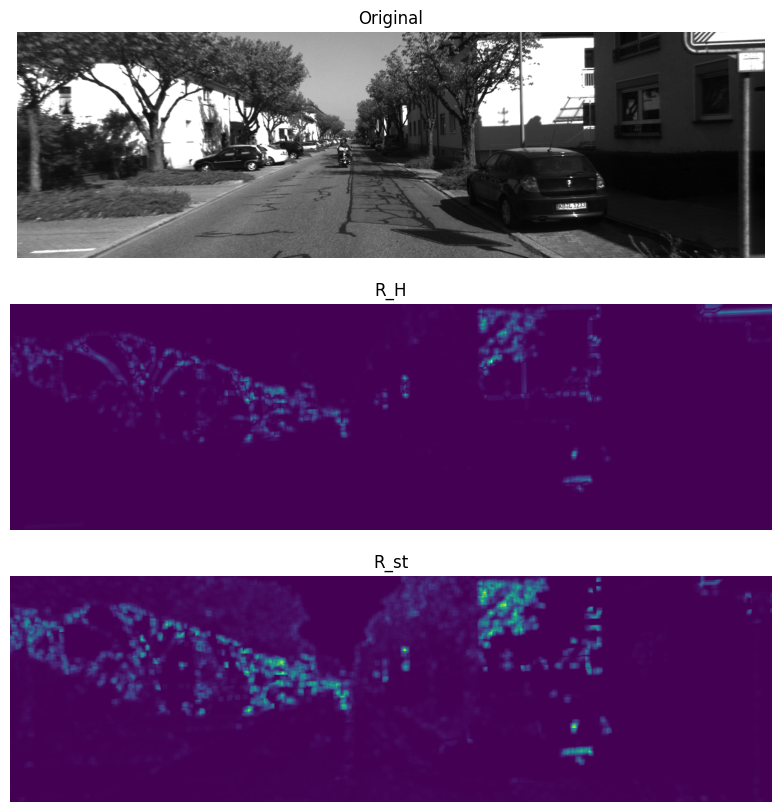

In [52]:
import matplotlib.pyplot as plt

fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(3, 1, figsize=(10, 10))

ax_orig.imshow(ascent, cmap='gray')

ax_orig.set_title('Original')

ax_orig.set_axis_off()

ax_mag.imshow(np.absolute(R_H))

ax_mag.set_title('R_H')

ax_mag.set_axis_off()

ax_ang.imshow(np.absolute(R_st)) # hsv is cyclic, like angles

ax_ang.set_title('R_st')

ax_ang.set_axis_off()

fig.show()

In [ ]:
def selectKeypoints(scores, num, r):
    """
    Selects the num best scores as keypoints and performs non-maximum supression of a (2r + 1)*(2r + 1) box around
    the current maximum.
    """
    for i in range(r):
        m,n = np.unravel_index(np.argmax(scores, axis=None), scores.shape)
        max_value[i] = scores[m,n]
        if max_value[i] > 0  
            max_index[i] = [m,n]            
        else
            break  
        scores[m-r:m+r+1,n-r:n+r+1] = 0
        
    return max_index
        
        

In [68]:
scores = R_H

In [80]:
max_index = np.unravel_index(np.argmax(R_H, axis=None), R_H.shape)
max_value = R_H[max_index]
 
print(max_index, max_value)
m,n = max_index

(94, 778) 87202384435226.14


In [176]:
r = 3
scores[m-r:m+r,n-r:n+r] = 0

/tmp/ipykernel_27433/642414499.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


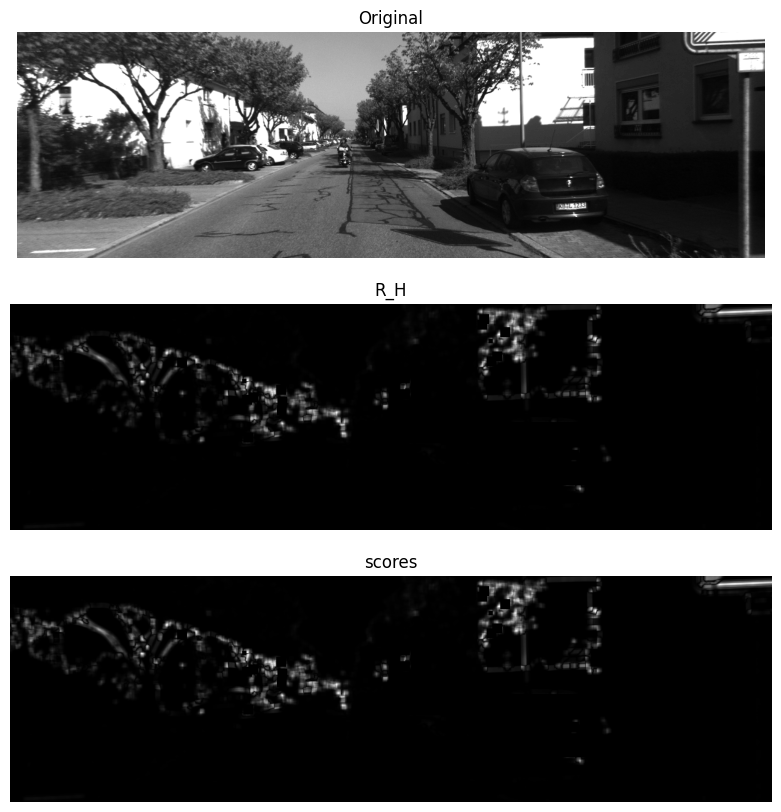

In [185]:
fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(3, 1, figsize=(10, 10))

ax_orig.imshow(ascent, cmap='gray')

ax_orig.set_title('Original')

ax_orig.set_axis_off()

ax_mag.imshow(np.absolute(R_H), cmap='gray')

ax_mag.set_title('R_H')

ax_mag.set_axis_off()

ax_ang.imshow(np.absolute(scores), cmap='gray') # hsv is cyclic, like angles

ax_ang.set_title('scores')

ax_ang.set_axis_off()

fig.show()

In [181]:
max_index = np.unravel_index(np.argmax(R_H, axis=None), R_H.shape)
max_value = R_H[max_index]
 
print(max_index, max_value)
m,n = max_index

(125, 378) 39531845499570.57


In [182]:
scores[m-r:m+r+1,n-r:n+r+1] = 0

In [183]:
scores[m-r:m+r,n-r:n+r]

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [184]:
scores[m,n]

0.0

In [14]:
x =  np.array([[2,3,1],
                [1,1,0],
                [0,4,2]])
 
# numpy最大值坐标
max_index = np.unravel_index(np.argmax(x, axis=None), x.shape)
 
# numpy最大值
max_value = x[max_index]
 
print(max_index, max_value)

(2, 1) 4


In [21]:
x[1]

array([1, 1, 0])

In [199]:
index_stack = np.array([[],[]])

In [200]:
index_stack

array([], shape=(2, 0), dtype=float64)

In [201]:
index_stack.shape

(2, 0)

In [217]:
index_stack[1,] = np.array([3,1])

ValueError: could not broadcast input array from shape (2,) into shape (0,)

In [218]:
index_stack

array([], shape=(2, 0), dtype=float64)